# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd


print("Libraries imported successfully!")



Libraries imported successfully!


In [2]:
data_dir = 'data/dataset'
train_dir = 'data/dataset/Images/Train'
test_dir = 'data/dataset/Images/Test'

In [3]:
image_size = (180, 180)
batch_size = 32
class_names = ['audi', 'lamborghini', 'mercedes']

In [5]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  
)

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [7]:
print("Training data shape:", train_generator.n, "images in", len(train_generator.class_indices), "classes.")
print("Test data shape:", test_generator.n, "images in", len(test_generator.class_indices), "classes.")

Training data shape: 64 images in 3 classes.
Test data shape: 58 images in 3 classes.


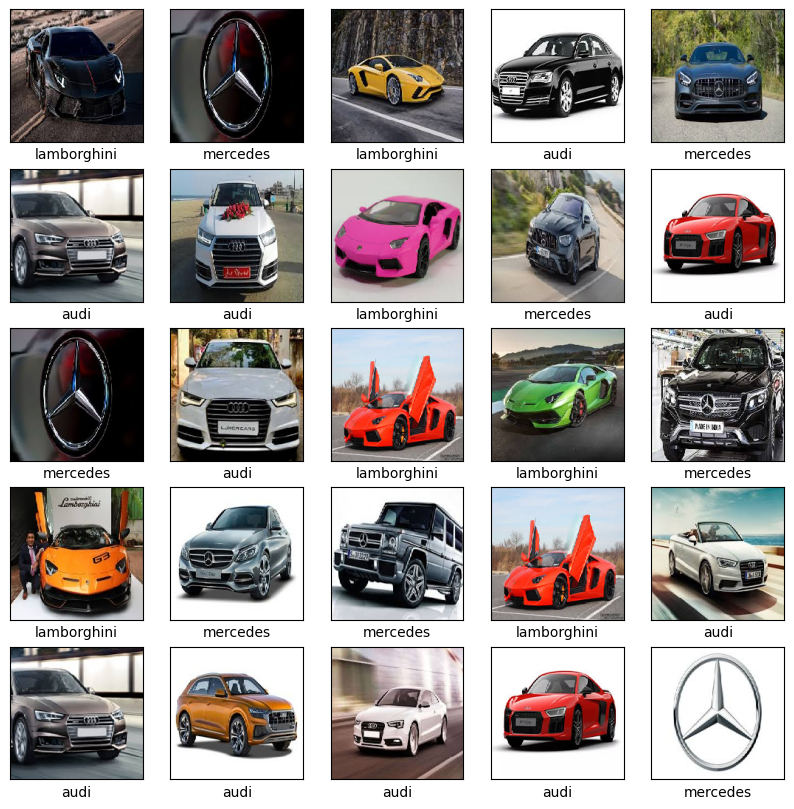

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.xlabel(class_names[np.argmax(label[0])])  # Display the class name
plt.show()

In [9]:
model = tf.keras.Sequential([
     tf.keras.layers.Rescaling(1.0 / 255.0), #normzlisation
    tf.keras.layers.Flatten(input_shape=(image_size, 3)),  # Aplatir l'image (64x64x3 devient un vecteur 1D)
    tf.keras.layers.Dense(600, activation='relu'),  # Première couche dense
    tf.keras.layers.Dropout(0.5),  # Pour éviter le sur-apprentissage
    tf.keras.layers.Dense(600, activation='relu'),  # Deuxieme couche dense
    
    
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Couche de sortie
])

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size,
                    epochs=10) 

Epoch 1/10


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3542 - loss: 1.0931 - val_accuracy: 0.3438 - val_loss: 1.2064
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step - accuracy: 0.3125 - loss: 1.1438 - val_accuracy: 0.1875 - val_loss: 1.2427
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step - accuracy: 0.4792 - loss: 1.0682 - val_accuracy: 0.4375 - val_loss: 0.9962
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - accuracy: 0.4583 - loss: 1.0943 - val_accuracy: 0.3438 - val_loss: 1.0817
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.4583 - loss: 1.0496 - val_accuracy: 0.2500 - val_loss: 1.1461
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - accuracy: 0.4792 - loss: 1.0389 - val_accuracy: 0.3750 - val_loss: 1.0613
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step - accuracy: 0.5833 - loss: 0.9530 - val_accuracy: 0.2812 - val_loss: 1.0824
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step - accuracy: 0.6042 - loss: 0.9104 - val_accuracy: 0.5312 - val_loss: 1.0312
Epoch

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - 197ms/step - accuracy: 0.5000 - loss: 1.0402

Test accuracy: 0.5


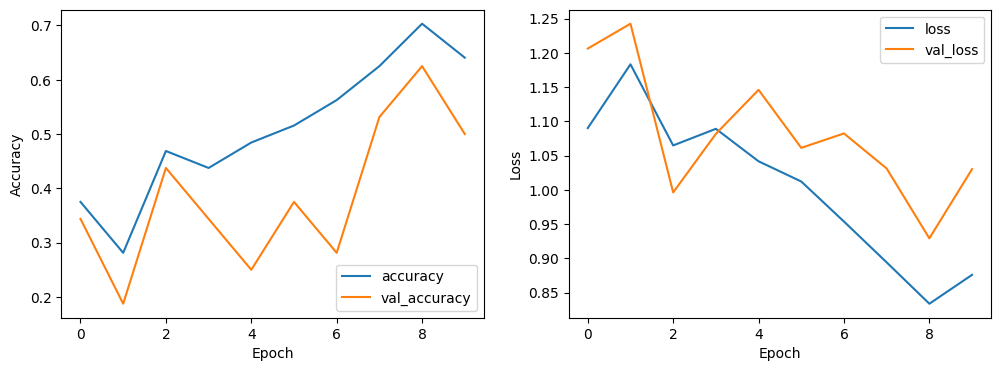

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()